In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import yfinance

import sys
sys.path.append("../quant_research_toolbox")
from strategies import *
from utils import *
from risk import *
from plots import *

In [3]:
df_aapl = load_ticker_data("AAPL", start_date="2025-01-01", end_date="2025-06-01")
df_aapl.head()

/home/onyxia/work/quant_research_toolbox/notebooks/../quant_research_toolbox/utils.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ticker = yf.download(ticker_name, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


,close,high,low,open,volume,ohlc_price,typical_price,median_price
Date,,,,,,,,
2025-01-02,243.263199,248.500565,241.238085,248.330961,55740700,245.333202,244.333950,244.869325
2025-01-03,242.774368,243.592387,241.307905,242.774368,40244100,242.612257,242.558220,242.450146
2025-01-06,244.410416,246.734810,242.614744,243.722074,45045600,244.370511,244.586657,244.674777
2025-01-07,241.627136,244.959095,240.769205,242.395272,40856000,242.437677,242.451812,242.864150
2025-01-08,242.115936,243.123515,239.472320,241.337815,37628900,241.512396,241.570590,241.297918


In [4]:
Momentum.sma_crossover(df_aapl, "ohlc_price")

,fast_sma,slow_sma,signal,orders
Date,,,,
2025-01-02,245.333202,245.333202,0,0.0
2025-01-03,243.972730,243.972730,0,0.0
2025-01-06,244.105324,244.105324,0,0.0
2025-01-07,243.688412,243.688412,0,0.0
2025-01-08,243.253209,243.253209,0,0.0
...,...,...,...,...
2025-05-23,202.904500,203.690665,0,-1.0
2025-05-27,201.217001,203.922651,0,0.0
2025-05-28,199.997500,203.728187,0,0.0


In [5]:
Momentum.naive_momentum(df_aapl, "ohlc_price")

,nb_consecutive_days,signal,price_diff,orders
Date,,,,
2025-01-02,0,0,NaN,0
2025-01-03,-1,0,-2.720945,0
2025-01-06,0,0,1.758254,0
2025-01-07,-1,0,-1.932834,0
2025-01-08,-2,0,-0.925281,-1
...,...,...,...,...
2025-05-23,75,0,-6.105000,0
2025-05-27,76,0,4.145000,0
2025-05-28,77,0,1.739994,0


In [6]:
MeanReversion.sma_mean_reversion(df_aapl, "ohlc_price")

,sma,std,signal,orders
Date,,,,
2025-01-02,243.263199,NaN,0,0.0
2025-01-03,243.018784,0.345655,1,1.0
2025-01-06,243.482661,0.839813,-1,-2.0
2025-01-07,243.018780,1.153661,1,2.0
2025-01-08,242.838211,1.077602,1,0.0
...,...,...,...,...
2025-05-23,205.631774,6.511861,1,0.0
2025-05-27,205.149035,6.539349,1,0.0
2025-05-28,204.623365,6.472115,1,0.0


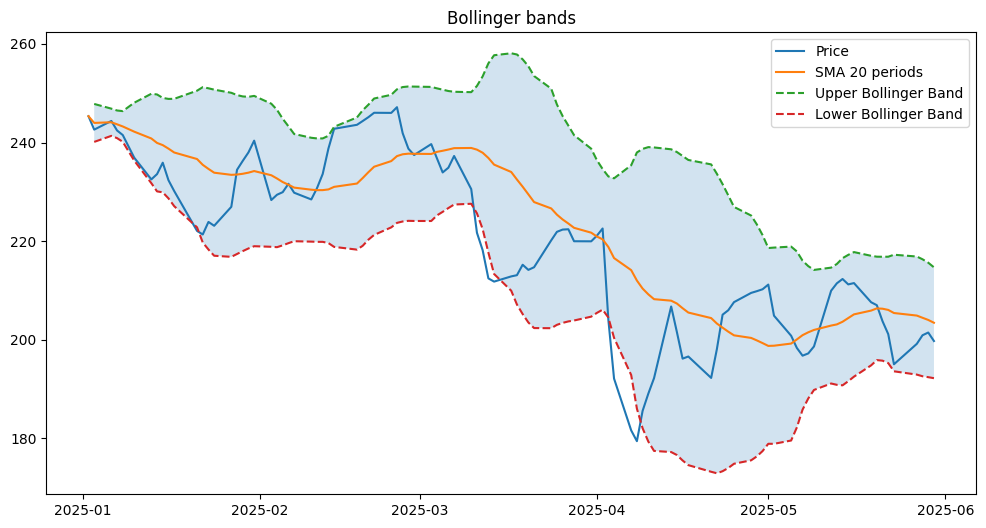

In [7]:
bollinger_bands(df_aapl["ohlc_price"])